<blockquote>
    <h1>Exercise 4.13</h1>
    <p>Using the <code>Boston</code> data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.</p>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("../../DataSets/Boston/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<p>Let us create a binary variable, $\mathrm{crim01}$, that contains a $1$ if $\mathrm{crim}$ contains a value above its median, and a $0$ if $\mathrm{crim}$ contains a value below its median.</p>

In [3]:
median_crim = df['crim'].median()
df['crim01'] = np.where(df['crim'] > median_crim, 1, 0)

<p>We know produce scatter and box plots of $\mathrm{crim01}$ against the other variables to gain a better insight which variables might be useful for predicting $\mathrm{crim01}$.</p>

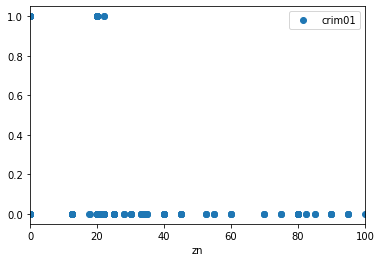

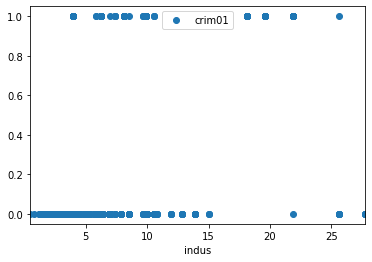

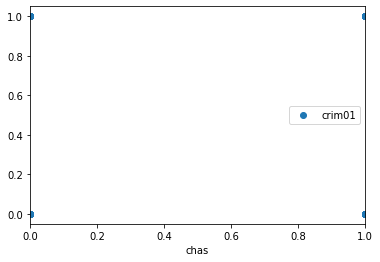

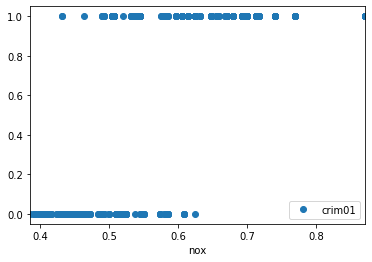

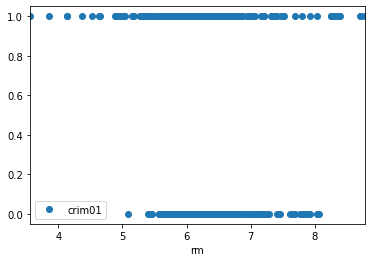

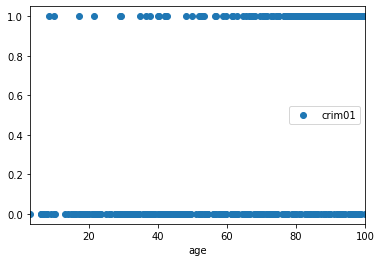

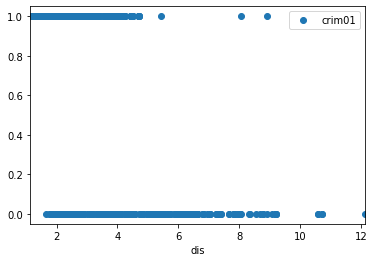

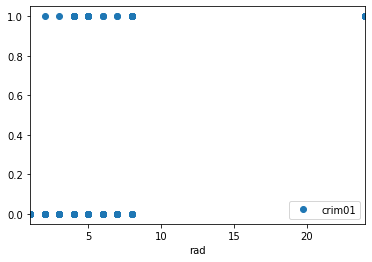

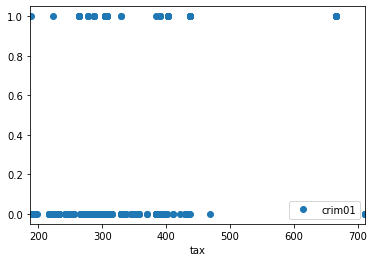

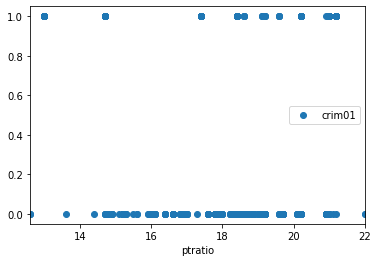

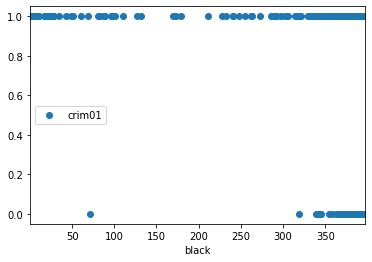

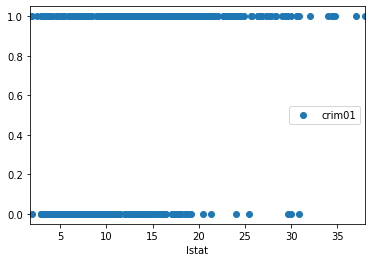

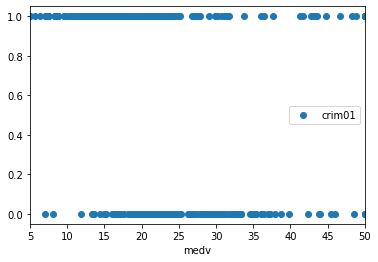

In [4]:
for column in df.columns:
    if column == 'crim' or column == 'crim01':
        continue
    
    _ = df.plot(x=column, y='crim01', style='o')

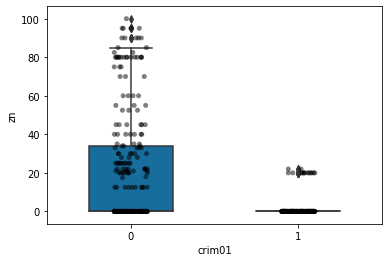

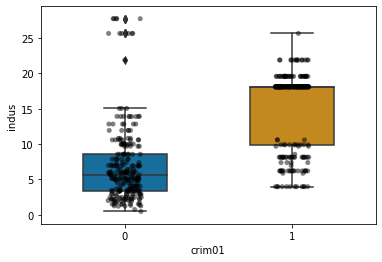

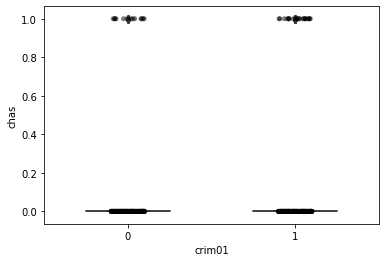

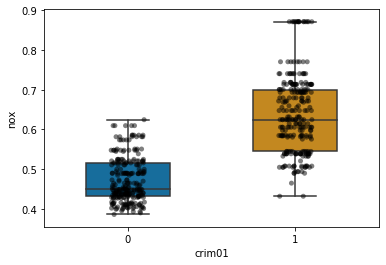

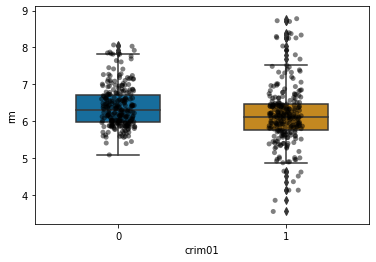

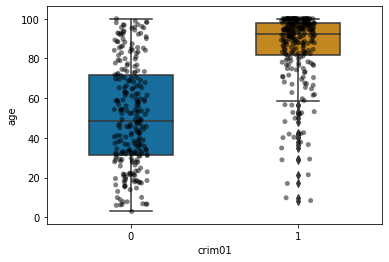

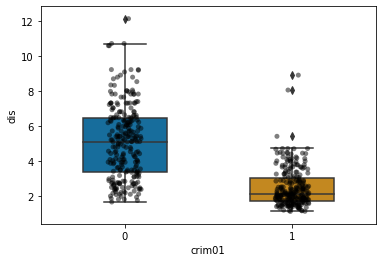

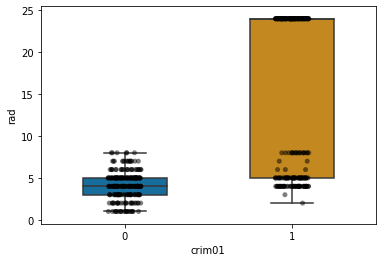

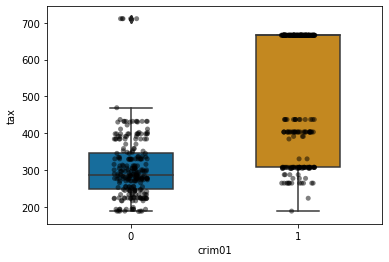

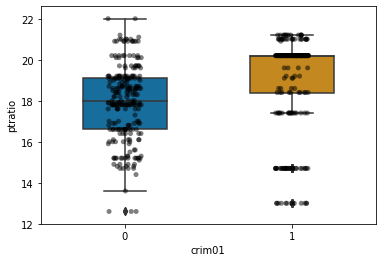

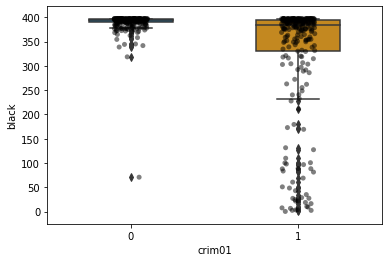

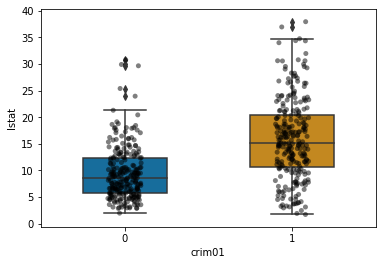

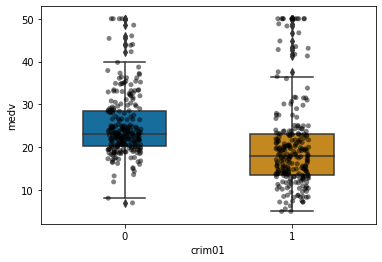

In [5]:
for index, column in enumerate(df.columns):
    if column == 'crim' or column == 'crim01':
        continue
        
    _ = plt.figure(index)
    # http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/
    # make boxplot with Seaborn
    _ = sns.boxplot(y=column, x='crim01', data=df, width=0.5, palette="colorblind")
    # add stripplot to boxplot with Seaborn
    _ = sns.stripplot(y=column, x='crim01', data=df, jitter=True, marker='o', 
                          alpha=0.5, color='black')

<p>From the boxplots it appears that the $\mathrm{indus}$, $\mathrm{nox}$, $\mathrm{rm}$, $\mathrm{age}$, $\mathrm{dis}$, $\mathrm{rad}$, $\mathrm{tax}$, $\mathrm{ptratio}$, $\mathrm{black}$, $\mathrm{lstat}$ and $\mathrm{medv}$ variables could be useful in predicting $\mathrm{crim01}$.</p>

<p>Before we continue, let us first split the data in a training and a test set, where we assign $20 \%$ of the data to the test set.</p>

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((404, 15), (102, 15))

<p>We now perform LDA on the training data in order to predict $\mathrm{crim01}$ using the variables we identified above with the box plots.</p>

In [7]:
targetColumn = ['crim01']
descriptiveColumns = ['indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
df_train.head()
X_train = df_train[descriptiveColumns].to_numpy()
Y_train = np.squeeze(df_train[targetColumn].to_numpy())
X_test = df_test[descriptiveColumns].to_numpy()

model = LinearDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_test['crim01'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,1
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4,0
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,1
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2,1


Predicted                    
                             less than median greater than median
Observed less than median                  49                   3
         greater than median               13                  37

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               94.23                5.77
             greater than median            26.00               74.00

'The classification accuracy is 84.31%.'

<p>We now perform QDA on the training data in order to predict $\mathrm{crim01}$ using the variables we identified above with the box plots.</p>

In [8]:
model = QuadraticDiscriminantAnalysis()
_ = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_test['crim01'],
    'Predicted': Y_pred,
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Predicted                    
                             less than median greater than median
Observed less than median                  52                   0
         greater than median               14                  36

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               100.0                 0.0
             greater than median             28.0                72.0

'The classification accuracy is 86.27%.'

<p>We now perform logistic regression on the training data in order to predict $\mathrm{crim01}$ using the variables we identified above with the box plots.</p>

In [9]:
df_train.insert(0, 'Intercept', 1)
df_test.insert(0, 'Intercept', 1)
descriptiveColumns = ['Intercept', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
df_X_train = df_train[descriptiveColumns]
df_Y_train = df_train[targetColumn]
df_X_test = df_test[descriptiveColumns]
df_Y_test = df_test[targetColumn]

model = sm.Logit(df_Y_train, df_X_train)
fitted = model.fit()
fitted.summary()

sr_Y_pred = fitted.predict(df_X_test)
df_Y_test_and_pred = pd.DataFrame({
    'Observed': df_Y_test['crim01'],
    'Predicted': np.where(sr_Y_pred > 0.5, 1, 0),
})
df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
df_confusion  
df_confusion_pct.round(2)

confusion_matrix = df_confusion.to_numpy()
TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
f'The classification accuracy is {class_acc:.2f}%.'

Optimization terminated successfully.
         Current function value: 0.225731
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                           11
Date:                Sat, 18 Jan 2020   Pseudo R-squ.:                  0.6743
Time:                        21:01:45   Log-Likelihood:                -91.195
converged:                       True   LL-Null:                       -280.03
Covariance Type:            nonrobust   LLR p-value:                 3.354e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.9827      7.187     -4.589      0.000     -47.068     -18.897
indus         -0.0487      0.050     -0.979      0.328      -0.146       0.049
nox           47.0813      8.574      5.491      0.000      30.276      63.887
rm            -0.1456      0.748     -0.195      0.846      -1.611       1.320
age            0.0204      0.013      1.603      0.109      -0.005       0.045
dis            0.4255      0.184      2.306      0.021       0.064       0.787
rad            0.6281      0.148      4.237      0.000       0.338       0.919
tax           -0.0068      0.003     -2.456      0.014      -0.012      -0.001
ptratio        0.3405      0.126      2.703      0.007       0.094       0.587
black         -0.0115      0.006     -1.844      0.065      -0.024       0.001
lstat          0.0261      0.051      0.515      0.607      -0.073       0.125
medv           0.1197      0.068      1.762      0.078      -0.013       0.253
==============================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Predicted                    
                             less than median greater than median
Observed less than median                  51                   1
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               98.08                1.92
             greater than median            14.00               86.00

'The classification accuracy is 92.16%.'

<p>We now perform KNN on the training data, with several values of $K$, in order to predict $\mathrm{crim01}$ using the variables we identified above with the box plots.</p>

In [10]:
for n_neighbors in range(1, 31, 1):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    _ = model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    df_Y_test_and_pred = pd.DataFrame({
        'Observed': df_test['crim01'],
        'Predicted': Y_pred,
    })
    df_confusion, df_confusion_pct = createConfusionMatrixFromOutOfSampleData(df=df_Y_test_and_pred, binaryMap={0: 'less than median', 1: 'greater than median'})
    df_confusion  
    df_confusion_pct.round(2)

    confusion_matrix = df_confusion.to_numpy()
    TN, FP, FN, TP = confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0], confusion_matrix[1, 1]
    class_acc = 100 * ((TP + TN) / (TN + FP + FN + TP))
    f'The classification accuracy of {n_neighbors}-nearest neighbours is {class_acc:.2f}%.'
    '---'

Predicted                    
                             less than median greater than median
Observed less than median                  46                   6
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               88.46               11.54
             greater than median            14.00               86.00

'The classification accuracy of 1-nearest neighbours is 87.25%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  49                   3
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               94.23                5.77
             greater than median            16.00               84.00

'The classification accuracy of 2-nearest neighbours is 89.22%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  48                   4
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               92.31                7.69
             greater than median            14.00               86.00

'The classification accuracy of 3-nearest neighbours is 89.22%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  48                   4
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               92.31                7.69
             greater than median            14.00               86.00

'The classification accuracy of 4-nearest neighbours is 89.22%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  46                   6
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               88.46               11.54
             greater than median            14.00               86.00

'The classification accuracy of 5-nearest neighbours is 87.25%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  46                   6
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               88.46               11.54
             greater than median            14.00               86.00

'The classification accuracy of 6-nearest neighbours is 87.25%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            14.00               86.00

'The classification accuracy of 7-nearest neighbours is 86.27%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            14.00               86.00

'The classification accuracy of 8-nearest neighbours is 86.27%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            14.00               86.00

'The classification accuracy of 9-nearest neighbours is 86.27%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  46                   6
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               88.46               11.54
             greater than median            14.00               86.00

'The classification accuracy of 10-nearest neighbours is 87.25%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            14.00               86.00

'The classification accuracy of 11-nearest neighbours is 86.27%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 12-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 13-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 14-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 15-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 16-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 17-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 18-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 19-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 20-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 21-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  45                   7
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               86.54               13.46
             greater than median            16.00               84.00

'The classification accuracy of 22-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  43                   9
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               82.69               17.31
             greater than median            14.00               86.00

'The classification accuracy of 23-nearest neighbours is 84.31%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  44                   8
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               84.62               15.38
             greater than median            14.00               86.00

'The classification accuracy of 24-nearest neighbours is 85.29%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  43                   9
         greater than median                7                  43

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               82.69               17.31
             greater than median            14.00               86.00

'The classification accuracy of 25-nearest neighbours is 84.31%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  43                   9
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               82.69               17.31
             greater than median            16.00               84.00

'The classification accuracy of 26-nearest neighbours is 83.33%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  43                   9
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               82.69               17.31
             greater than median            16.00               84.00

'The classification accuracy of 27-nearest neighbours is 83.33%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  43                   9
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               82.69               17.31
             greater than median            16.00               84.00

'The classification accuracy of 28-nearest neighbours is 83.33%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  43                   9
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               82.69               17.31
             greater than median            16.00               84.00

'The classification accuracy of 29-nearest neighbours is 83.33%.'

'---'

Predicted                    
                             less than median greater than median
Observed less than median                  43                   9
         greater than median                8                  42

Predicted (%)                    
                                 less than median greater than median
Observed (%) less than median               82.69               17.31
             greater than median            16.00               84.00

'The classification accuracy of 30-nearest neighbours is 83.33%.'

'---'

<p>Thus, it seems that $K=2,3,4$ yields the best predictive model from all the KNN models; overall, the logistic regression model seems have the best predictive abilities.</p>